<a href="https://colab.research.google.com/github/John-p-v1999/Eigen-faces/blob/master/eigen_faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install cv2

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255)
train_dir=os.path.join('/content/gdrive/My Drive/Dataset/data/train/')
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(231,195),
                                                  batch_size=9,
                                                  class_mode='categorical')

Found 9 images belonging to 9 classes.


In [ ]:
x,y=train_generator.next()

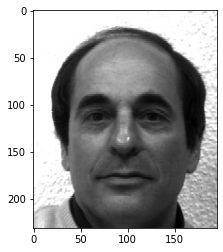

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x[0])

In [ ]:
x_train=x.reshape(9,135135)
print(x_train.shape)


(9, 135135)


In [ ]:
height=231
width=195
channel=3

In [ ]:
import numpy as np
mean_face=np.zeros((1,height*width*channel))
for ele in x_train:
  mean_face=np.add(mean_face,ele)
mean_face=np.divide(mean_face,x_train.shape[0])

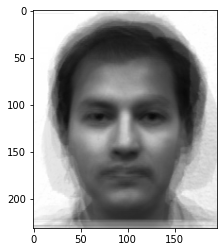

In [ ]:
plt.imshow(mean_face.reshape(height,width,channel))

In [ ]:
normalised_img=np.ndarray(shape=x_train.shape)
for i,ele in enumerate(x_train):
  normalised_img[i]=np.subtract(ele,mean_face)


In [ ]:
print(normalised_img.shape)

(9, 135135)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


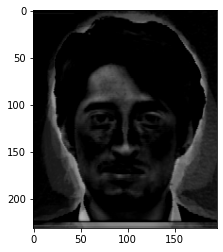

In [ ]:
plt.imshow(normalised_img[1].reshape(height,width,channel))
plt.show()

In [ ]:
cov_matrix = np.cov(normalised_img)
cov_matrix=np.divide(cov_matrix,9.0)
print(cov_matrix)

[[ 5.15961182e-03 -1.87476708e-03  8.37148237e-04  5.60353402e-04
   3.22877905e-04 -1.49327662e-04 -1.98760075e-03 -8.58724872e-04
  -2.00957100e-03]
 [-1.87476708e-03  3.44814556e-03 -1.78508520e-03 -5.98615776e-04
  -3.66832744e-04 -2.74139414e-04  6.95772379e-04 -2.81521147e-04
   1.03704342e-03]
 [ 8.37148237e-04 -1.78508520e-03  9.92334443e-03  1.04517218e-03
  -2.08361401e-04 -1.03572465e-03 -2.93568153e-03 -2.25605667e-03
  -3.58475540e-03]
 [ 5.60353402e-04 -5.98615776e-04  1.04517218e-03  3.06296259e-03
   5.17913526e-04 -4.02715639e-05 -1.57798257e-03 -7.86607917e-04
  -2.18292387e-03]
 [ 3.22877905e-04 -3.66832744e-04 -2.08361401e-04  5.17913526e-04
   3.10102718e-03  6.22582315e-04 -1.78168261e-03 -1.33576136e-03
  -8.71762808e-04]
 [-1.49327662e-04 -2.74139414e-04 -1.03572465e-03 -4.02715639e-05
   6.22582315e-04  3.46098667e-03 -8.66860916e-04 -8.12835392e-04
  -9.04409384e-04]
 [-1.98760075e-03  6.95772379e-04 -2.93568153e-03 -1.57798257e-03
  -1.78168261e-03 -8.6686091

In [ ]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('Eigenvectors  \n%s' %eigenvectors)
print('\nEigenvalues  \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[ 0.26801351 -0.39133036  0.33333333  0.62506775  0.02455139  0.19169473
   0.34442914 -0.33935009 -0.04548568]
 [-0.19685834  0.06917809  0.33333333 -0.46282457  0.20832872  0.54553653
   0.04424462 -0.33607462 -0.41860339]
 [ 0.64822434  0.65016148  0.33333333 -0.06430627  0.02820249  0.03918336
   0.10089973  0.0772768   0.15285837]
 [ 0.21259932 -0.16443276  0.33333333 -0.05981873 -0.55635211 -0.27845251
  -0.46196775 -0.02998868 -0.46010543]
 [ 0.12009017 -0.35741463  0.33333333 -0.30248774  0.51290209 -0.49409126
   0.23273326  0.28615123 -0.10945853]
 [ 0.02741994 -0.37177748  0.33333333 -0.30179761 -0.17890427  0.24904867
  -0.22535893  0.02487497  0.71651891]
 [-0.39575799  0.29847724  0.33333333  0.15172247  0.17636687 -0.45482749
  -0.20513931 -0.53374418  0.23498474]
 [-0.24573954  0.10534669  0.33333333  0.42618308  0.27739383  0.26400155
  -0.41206492  0.55896276 -0.083006  ]
 [-0.43799141  0.16179174  0.33333333 -0.01173839 -0.49248901 -0.062093

In [ ]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]


eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

In [ ]:
print(eigvalues_sort)
print(eigvectors_sort)

[0.016141671617498302, 0.007066659720511722, 0.005293655392885601, 0.0035424892783286863, 0.0031347714022914135, 0.0029173118688175987, 0.0023394390559607213, 0.001679071472133274, 3.522132197660798e-18]
[array([ 0.26801351, -0.19685834,  0.64822434,  0.21259932,  0.12009017,
        0.02741994, -0.39575799, -0.24573954, -0.43799141]), array([-0.39133036,  0.06917809,  0.65016148, -0.16443276, -0.35741463,
       -0.37177748,  0.29847724,  0.10534669,  0.16179174]), array([ 0.62506775, -0.46282457, -0.06430627, -0.05981873, -0.30248774,
       -0.30179761,  0.15172247,  0.42618308, -0.01173839]), array([ 0.34442914,  0.04424462,  0.10089973, -0.46196775,  0.23273326,
       -0.22535893, -0.20513931, -0.41206492,  0.58222416]), array([-0.04548568, -0.41860339,  0.15285837, -0.46010543, -0.10945853,
        0.71651891,  0.23498474, -0.083006  ,  0.01229702]), array([-0.33935009, -0.33607462,  0.0772768 , -0.02998868,  0.28615123,
        0.02487497, -0.53374418,  0.55896276,  0.29189181]

Cumulative proportion of variance explained vector: 
[0.38327543 0.55106952 0.67676456 0.76087909 0.83531258 0.9045826
 0.96013134 1.         1.        ]


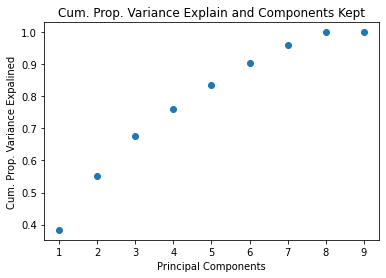

In [ ]:
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)


print("Cumulative proportion of variance : \n%s" %var_comp_sum)


num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, var_comp_sum)
plt.show()

In [ ]:
reduced_data = np.array(eigvectors_sort[:8]).transpose()

In [ ]:
proj_data = np.dot(x_train.transpose(),reduced_data)
proj_data = proj_data.transpose()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


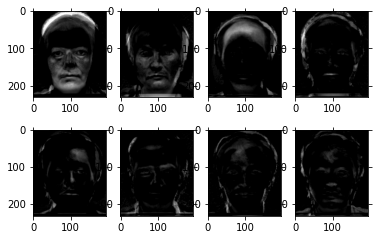

In [ ]:
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height,width,channel)
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='jet')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [ ]:
w = np.array([np.dot(proj_data,i) for i in normalised_img])
w

array([[ 5.31854392e+03, -3.29242621e+03,  4.05807795e+03,
         1.57351096e+03, -3.82091566e+01, -1.10312908e+03,
         6.23579322e+02,  1.01109293e+02],
       [-4.06970747e+03,  3.39643190e+02, -3.10125835e+03,
        -1.31568526e+02, -2.08226759e+03, -1.55535267e+03,
         1.27103779e+03,  2.42080033e+02],
       [ 1.31817555e+04,  6.15475702e+03, -1.43762539e+02,
         1.15129341e+03,  1.66440992e+03,  1.08139142e+03,
         7.36771027e+02,  4.65369616e+02],
       [ 3.58606804e+03, -2.14364416e+03, -7.33309717e+02,
        -2.91355998e+03, -3.14771275e+03, -1.14638885e+03,
        -1.59786505e+03, -1.66149465e+03],
       [ 2.33433980e+03, -3.10067169e+03, -1.96122961e+03,
         9.66221179e+02, -4.72387304e+02,  9.74178723e+02,
        -1.43764584e+03,  1.02663287e+03],
       [ 7.40863775e+02, -2.94344209e+03, -1.82299313e+03,
        -6.52667274e+02,  3.21215645e+03,  4.46780299e+02,
         9.86323996e+02, -1.84225183e+02],
       [-8.00435458e+03,  2.273153

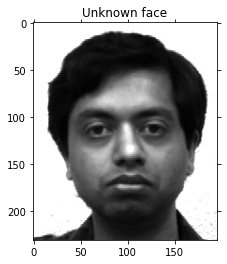

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_dir=os.path.join('/content/gdrive/My Drive/Dataset/test/')
test_generator=train_datagen.flow_from_directory(test_dir,
                                                  target_size=(231,195),
                                                  batch_size=9,
                                                  class_mode='categorical')

Found 1 images belonging to 1 classes.


In [ ]:
unknown_face_vector,label=test_generator.next()
label=3
unknown_face_vector=unknown_face_vector.flatten()

In [ ]:
test.shape

(135135,)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


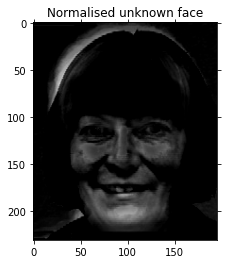

In [ ]:
normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)

plt.imshow(normalised_uface_vector.reshape(height, width,channel), cmap='gray')
plt.title('Normalised unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [ ]:
w_unknown = np.dot(proj_data, unknown_face_vector)
w_unknown

array([ 6300.29944964,   754.47367169, -4042.51482897, -2662.79796391,
       -4310.01976773, -3231.51579724, -2803.35959418, -1142.42719047])

In [ ]:
diff  = w - w_unknown
norms = np.linalg.norm(diff, axis=1)
print(norms)
np.argmin(norms)

[11703.66816434 11886.63918307 13254.34169193  5848.1808542
  9331.54835674 11787.35161313 16070.81436513 15405.0693902
 17736.54386938]


3